In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ektanegi25/Forest-Cover-Type/main/forest_cover.csv")
df.shape

(110393, 52)

In [3]:
df.head()

,elevation,aspect,slope,horizontal_distance_to_hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,wilderness_area1,wilderness_area2,wilderness_area3,...,soil_type_32,soil_type_33,soil_type_34,soil_type_35,soil_type_36,soil_type_37,soil_type_38,soil_type_39,soil_type_40,class
0,2754,146,5,150,2,1790,700,1,0,0,...,0,0,0,0,0,0,0,0,0,Lodgepole_Pine
1,3219,21,8,67,-1,2869,1825,0,0,1,...,0,0,0,0,0,0,0,0,0,Spruce_Fir
2,2965,337,16,42,7,4288,324,1,0,0,...,0,0,0,0,0,0,0,0,0,Spruce_Fir
3,2368,14,15,150,65,1006,812,0,0,0,...,0,0,0,0,0,0,0,0,0,Douglas_fir
4,2366,165,3,390,156,1165,582,0,0,0,...,0,0,0,0,0,0,0,0,0,Douglas_fir


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110393 entries, 0 to 110392
Data columns (total 52 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   elevation                           110393 non-null  int64 
 1   aspect                              110393 non-null  int64 
 2   slope                               110393 non-null  int64 
 3   horizontal_distance_to_hydrology    110393 non-null  int64 
 4   Vertical_Distance_To_Hydrology      110393 non-null  int64 
 5   Horizontal_Distance_To_Roadways     110393 non-null  int64 
 6   Horizontal_Distance_To_Fire_Points  110393 non-null  int64 
 7   wilderness_area1                    110393 non-null  int64 
 8   wilderness_area2                    110393 non-null  int64 
 9   wilderness_area3                    110393 non-null  int64 
 10  wilderness_area4                    110393 non-null  int64 
 11  soil_type_1                         110

In [5]:
len(df['class'].unique())

7

In [6]:
X,y=df.drop('class',axis=1),df['class']

In [7]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
y=encode.fit_transform(y)

In [8]:
cat_col=[]
num_col=[]
for i in X.columns:
    if i[:9]=='soil_type' or i[:15]=='wilderness_area':
        cat_col.append(i)
    else:
        num_col.append(i)

In [9]:
num_col

['elevation',
 'aspect',
 'slope',
 'horizontal_distance_to_hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Fire_Points']

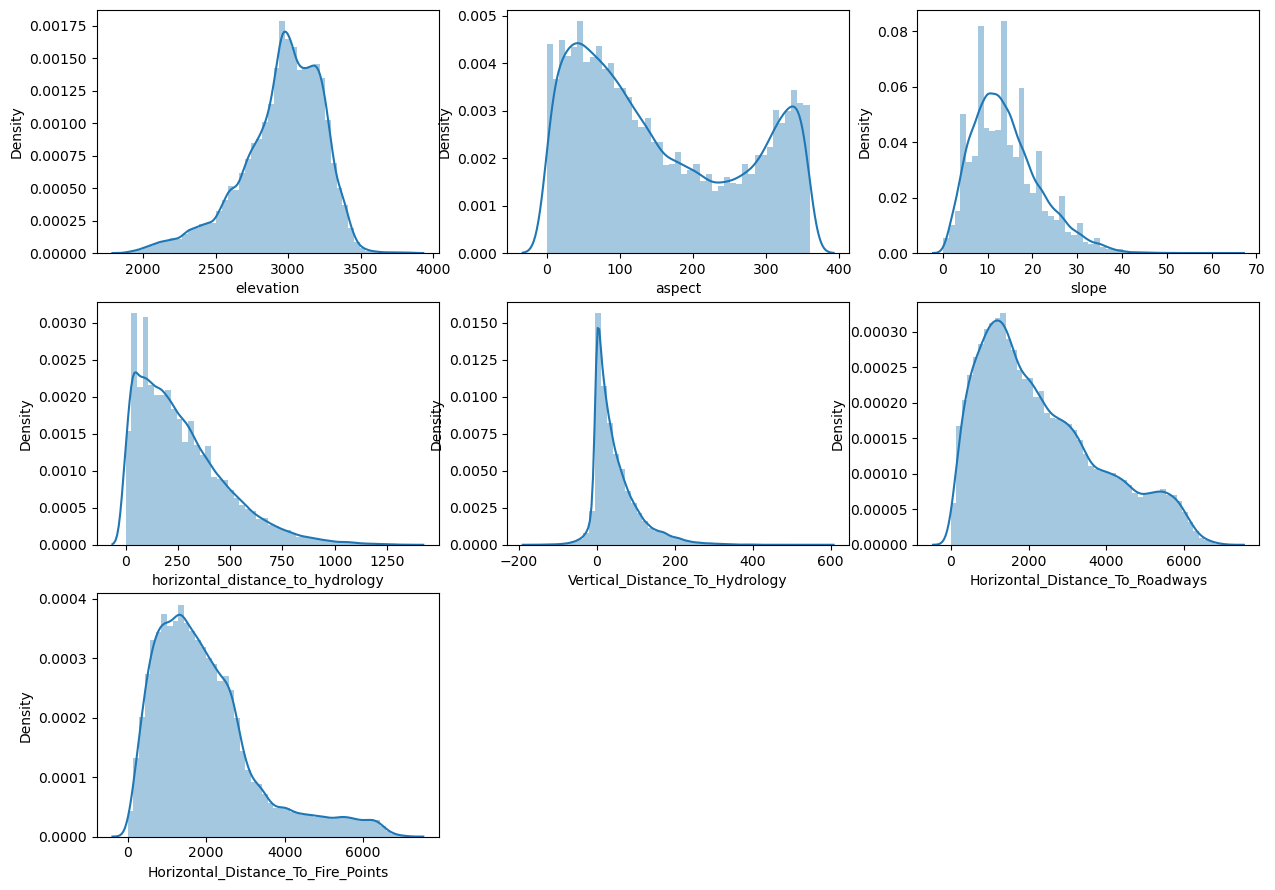

In [10]:
plt.figure(figsize=(15,60),facecolor='white')
plot=1
for col in num_col:
    ax=plt.subplot(16,3,plot)
    sns.distplot(df[col])
    plt.xlabel(col)
    plot+=1
plt.show()

In [11]:
from sklearn.preprocessing import RobustScaler

In [12]:
ss=RobustScaler()

In [13]:
from sklearn.model_selection import train_test_split as tts
Xtr,Xte,ytr,yte=tts(X,y,test_size=0.3,random_state=23)

In [14]:
Xtr[num_col]=ss.fit_transform(Xtr[num_col])
Xte[num_col]=ss.transform(Xte[num_col])

In [15]:
ytr

array([6, 4, 5, ..., 5, 6, 4])

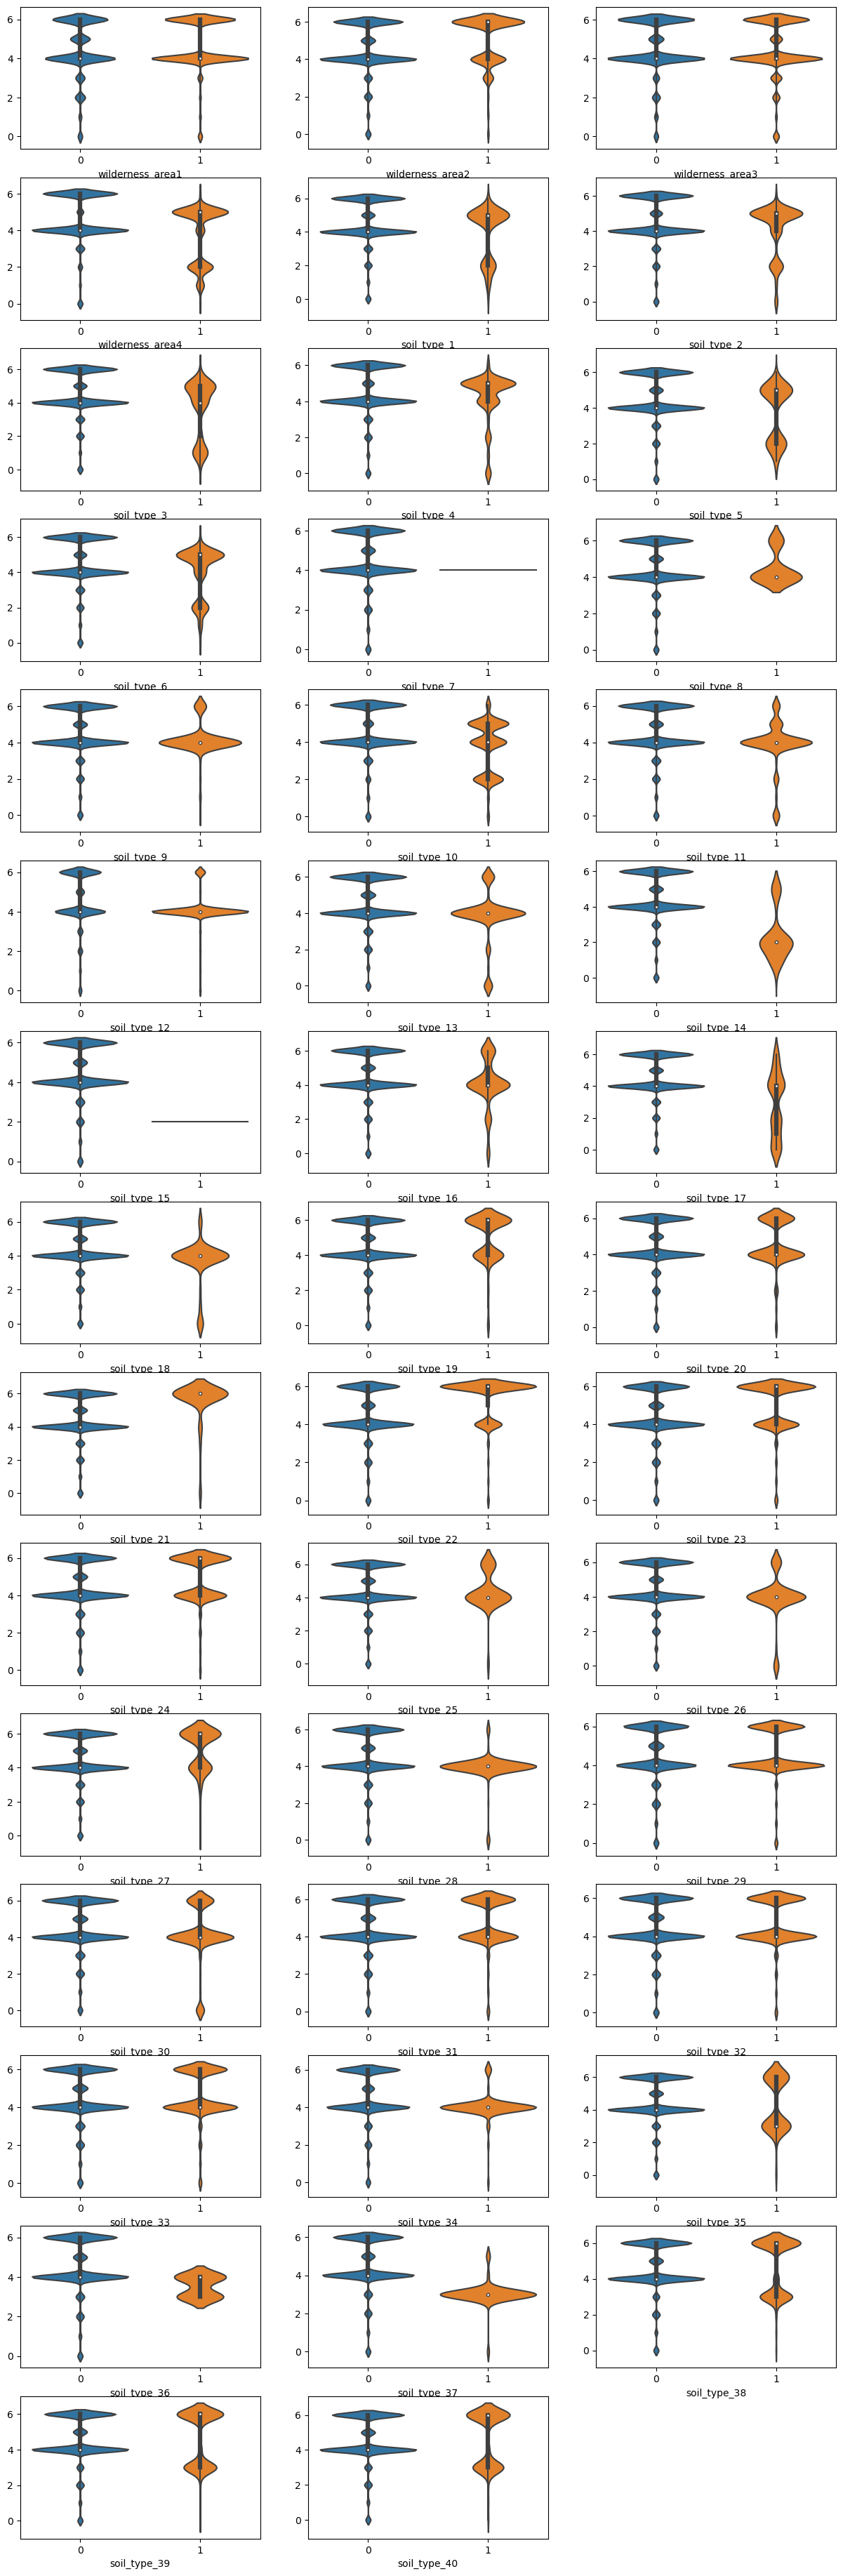

In [16]:
plt.figure(figsize=(15,50),facecolor='white')
plot=1
for col in cat_col:
    ax=plt.subplot(16,3,plot)
    sns.violinplot(data=df,x=df[col],y=y)
    plt.xlabel(col)
    plot+=1
plt.show()

<Axes: xlabel='class'>

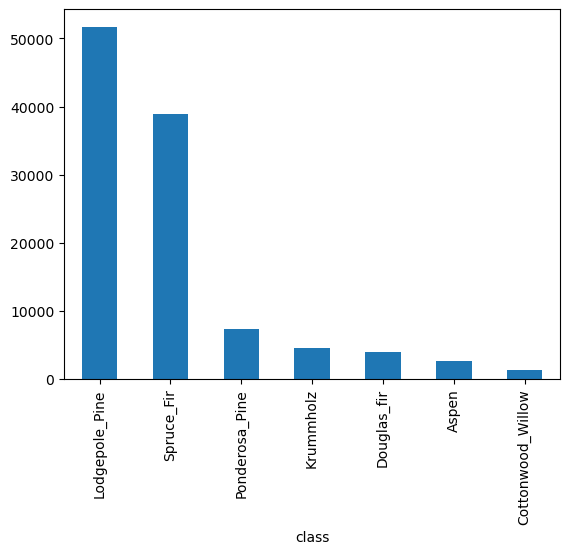

In [17]:
df['class'].value_counts().plot(kind='bar')

In [18]:
from imblearn.over_sampling import SMOTE

In [20]:
sample=SMOTE()
X_sam,y_sam=sample.fit_resample(X,y)

In [21]:
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import RobustScaler
ss=RobustScaler()
Xtr,Xte,ytr,yte=tts(X_sam,y_sam,random_state=42,test_size=0.3)

In [22]:
Xtr[num_col]=ss.fit_transform(Xtr[num_col])
Xte[num_col]=ss.fit_transform(Xte[num_col])

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
rf=RandomForestClassifier(n_estimators=50,max_depth=10)
rf.fit(Xtr,ytr)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [31]:
y_pred_rf=rf.predict(Xte)

In [32]:
print(classification_report(y_pred_rf,yte))

              precision    recall  f1-score   support

           0       0.70      0.59      0.64     18353
           1       0.47      0.75      0.58      9723
           2       0.65      0.74      0.69     13578
           3       0.78      0.81      0.80     15150
           4       0.62      0.56      0.59     17014
           5       0.76      0.77      0.76     15316
           6       0.68      0.55      0.61     19399

    accuracy                           0.67    108533
   macro avg       0.67      0.68      0.67    108533
weighted avg       0.68      0.67      0.67    108533



In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
cvscore=cross_val_score(rf,Xtr,ytr,cv=5,scoring='accuracy')

In [35]:
cvscore    

array([0.67251081, 0.66922682, 0.66906887, 0.67453799, 0.67548571])

In [36]:
from sklearn.model_selection import StratifiedKFold

In [37]:
sk=StratifiedKFold(n_splits=5,shuffle=True,random_state=15)
cvscore=cross_val_score(rf,Xtr,ytr,cv=sk,scoring='accuracy')

In [38]:
cvscore

array([0.66427768, 0.66697599, 0.67220818, 0.66348128, 0.66703522])

In [39]:
sk

StratifiedKFold(n_splits=5, random_state=15, shuffle=True)